In [1060]:
# part 1
import sklearn
import pandas as pd
import numpy as np

In [1061]:
data = pd.read_csv("./data/project2.csv")

In [1062]:
data.describe

<bound method NDFrame.describe of                     class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig breast breast-quad irradia

In [1063]:
data.shape

(286, 10)

In [1064]:
data.size

2860

In [1065]:
data.head()

class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no

In [1066]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [1067]:
# check for the null values
data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [1068]:
# convert variable object type to string
data = data.convert_dtypes()

In [1069]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    string
 1   age          286 non-null    string
 2   menopause    286 non-null    string
 3   tumor-size   286 non-null    string
 4   inv-nodes    286 non-null    string
 5   node-caps    286 non-null    string
 6   deg-malig    286 non-null    Int64 
 7   breast       286 non-null    string
 8   breast-quad  286 non-null    string
 9   irradiat     286 non-null    string
dtypes: Int64(1), string(9)
memory usage: 22.7 KB


In [1070]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='Count'>

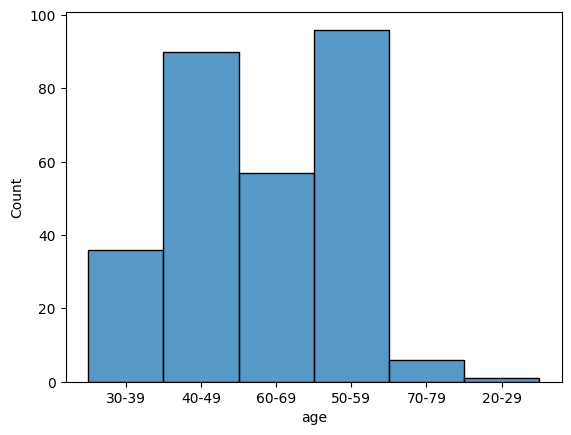

In [1071]:
# age
sns.histplot(x=data['age'])

<Axes: xlabel='menopause', ylabel='Count'>

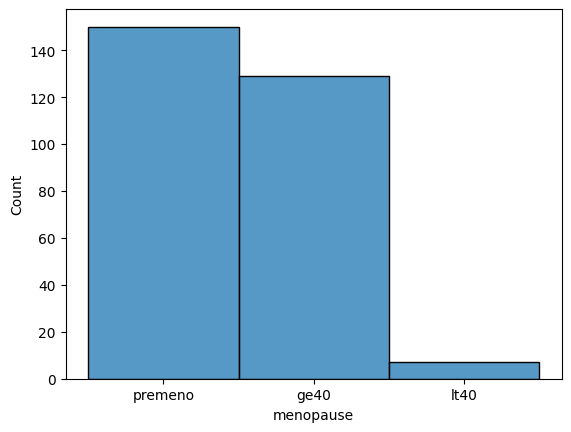

In [1072]:
# menopause
sns.histplot(x=data['menopause'])

<Axes: xlabel='tumor-size', ylabel='Count'>

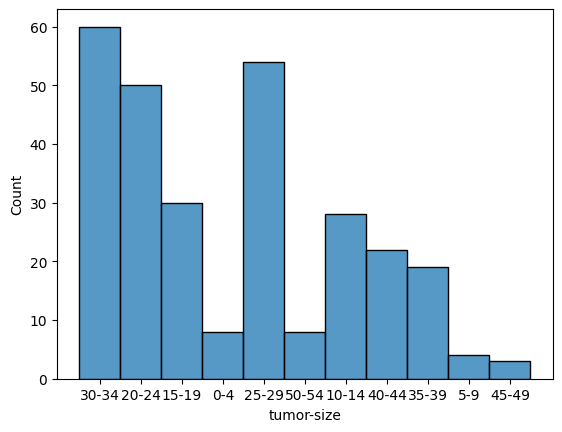

In [1073]:
# tumor-size
sns.histplot(x=data['tumor-size'])

<Axes: xlabel='inv-nodes', ylabel='Count'>

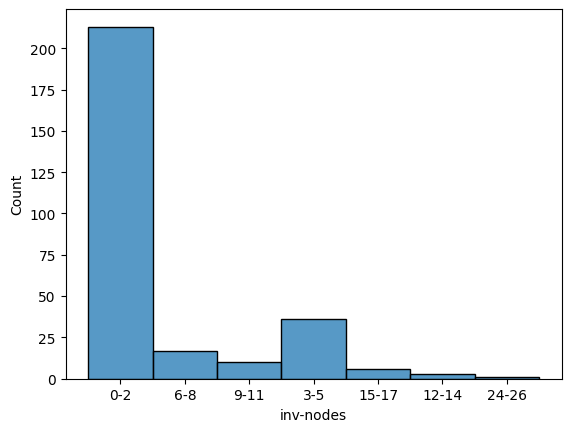

In [1074]:
# inv-nodes
sns.histplot(x=data['inv-nodes'])

<Axes: xlabel='node-caps', ylabel='Count'>

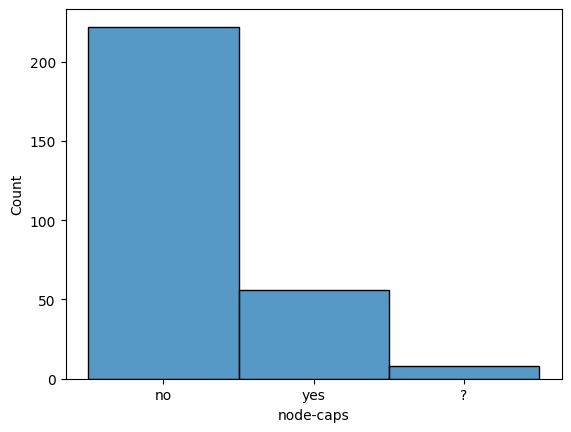

In [1075]:
# node-caps
sns.histplot(x=data['node-caps'])

In [1076]:
# Find missing values containing '?'
data[data.eq('?').any(axis=1)]

class    age menopause tumor-size inv-nodes node-caps  \
145  no-recurrence-events  40-49   premeno      25-29       0-2         ?   
163  no-recurrence-events  60-69      ge40      25-29       3-5         ?   
164  no-recurrence-events  60-69      ge40      25-29       3-5         ?   
183  no-recurrence-events  50-59      ge40      30-34      9-11         ?   
184  no-recurrence-events  50-59      ge40      30-34      9-11         ?   
206     recurrence-events  50-59      ge40      30-34       0-2        no   
233     recurrence-events  70-79      ge40      15-19      9-11         ?   
263     recurrence-events  50-59      lt40      20-24       0-2         ?   
264     recurrence-events  50-59      lt40      20-24       0-2         ?   

     deg-malig breast breast-quad irradiat  
145          2   left   right_low      yes  
163          1  right     left_up      yes  
164          1  right    left_low      yes  
183          3   left     left_up      yes  
184          3   left    left_low      yes  
206          3   left           ?       no  
233          1   left    left_low      yes  
263          1   left     left_up       no  
264          1   left    left_low       no

In [1077]:
# Replace '?' with NaN values
data.replace('?', np.nan, inplace=True)

# Drop rows containing NaN values
new_data = data.dropna()

In [1078]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        277 non-null    string
 1   age          277 non-null    string
 2   menopause    277 non-null    string
 3   tumor-size   277 non-null    string
 4   inv-nodes    277 non-null    string
 5   node-caps    277 non-null    string
 6   deg-malig    277 non-null    Int64 
 7   breast       277 non-null    string
 8   breast-quad  277 non-null    string
 9   irradiat     277 non-null    string
dtypes: Int64(1), string(9)
memory usage: 24.1 KB


<Axes: xlabel='deg-malig', ylabel='Count'>

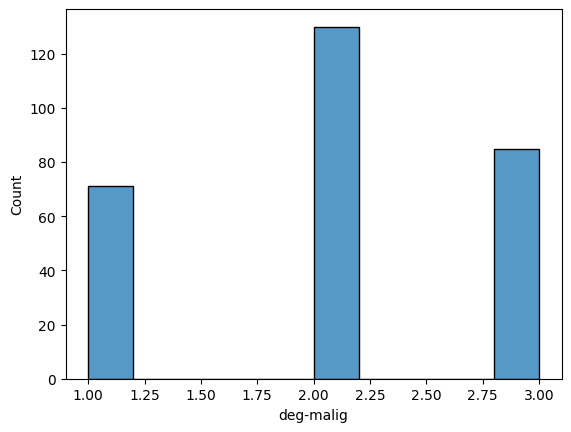

In [1079]:
# deg-malig
sns.histplot(x=data['deg-malig'])

<Axes: xlabel='breast', ylabel='Count'>

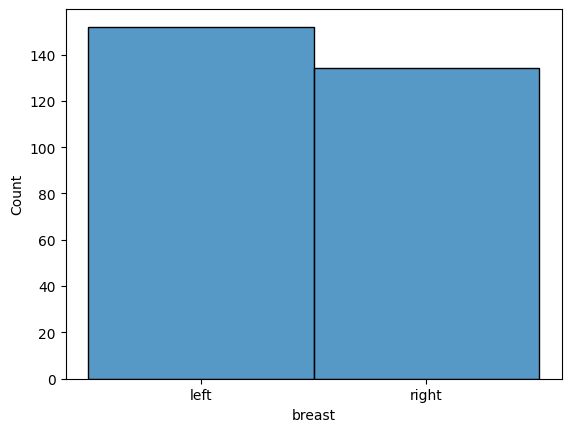

In [1080]:
# breast       
sns.histplot(x=data['breast'])

<Axes: xlabel='breast-quad', ylabel='Count'>

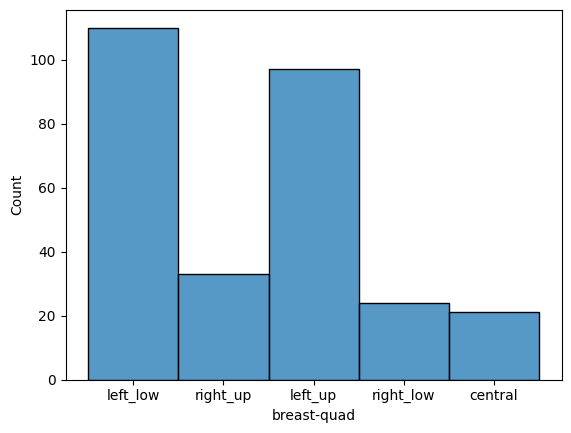

In [1081]:
# breast-quad       
sns.histplot(x=data['breast-quad'])

<Axes: xlabel='irradiat', ylabel='Count'>

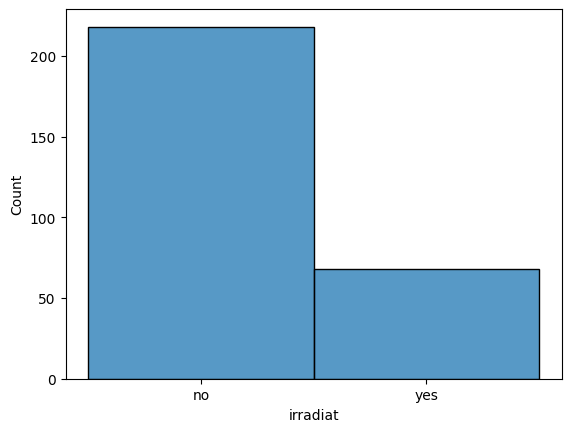

In [1082]:
# irradiat       
sns.histplot(x=data['irradiat'])

<Axes: xlabel='age', ylabel='count'>

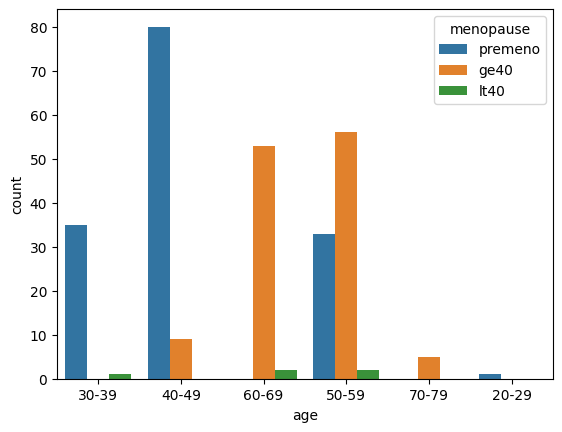

In [1083]:
# age vs menopause
sns.countplot(x='age',hue='menopause',data=new_data)

<Axes: xlabel='tumor-size', ylabel='count'>

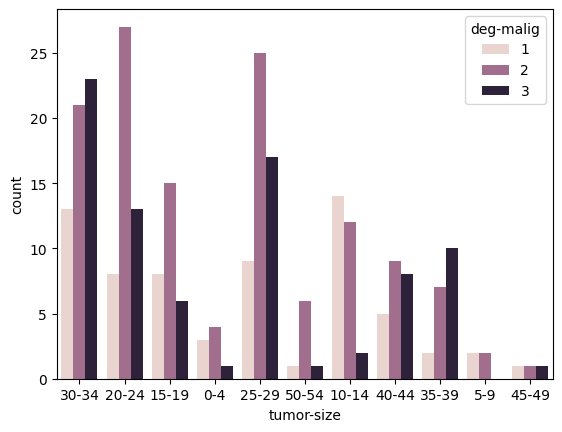

In [1084]:
# deg-malig vs tumor-size
sns.countplot(x='tumor-size',hue='deg-malig',data=new_data)

<Axes: xlabel='inv-nodes', ylabel='count'>

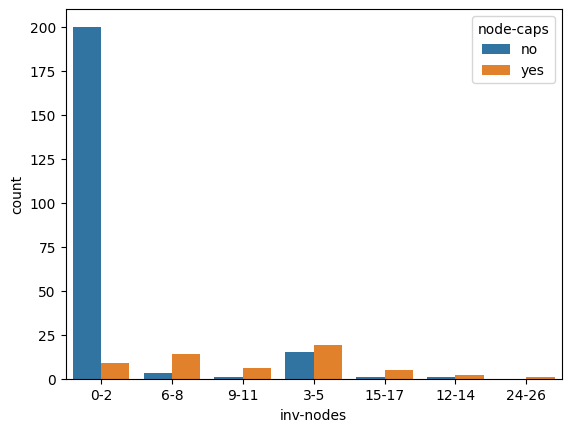

In [1085]:
# inv-nodes vs node-caps
sns.countplot(x='inv-nodes',hue='node-caps',data=new_data)

<Axes: xlabel='breast-quad', ylabel='count'>

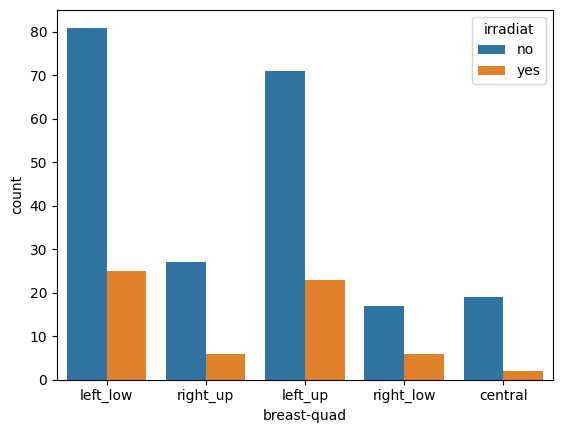

In [1086]:
# irradiat vs breast-quad
sns.countplot(x='breast-quad',hue='irradiat',data=new_data)

In [1087]:
# drop breast variable and hot encoding the breast-quad variables
new_data = new_data.drop(columns=['breast'])

from sklearn.preprocessing import OneHotEncoder
# one hot encode breast-quead
encoder = OneHotEncoder(sparse_output=False)
breast_encoder = encoder.fit_transform(new_data[['breast-quad']])
breast_encoder_pd = pd.DataFrame(breast_encoder, columns=encoder.get_feature_names_out(['breast-quad']))
new_data = pd.concat([new_data.drop('breast-quad',axis=1), breast_encoder_pd], axis=1)
new_data = new_data.dropna()

In [1088]:
# one hot encode class
encoder = OneHotEncoder(sparse_output=False)
class_encoder = encoder.fit_transform(new_data[['class']])
class_encoder_pd = pd.DataFrame(class_encoder, columns=encoder.get_feature_names_out(['class']))
new_data = pd.concat([new_data.drop('class',axis=1), class_encoder_pd], axis=1)
new_data = new_data.dropna()

In [1089]:
# one hot encode age
encoder = OneHotEncoder(sparse_output=False)
age_encoder = encoder.fit_transform(new_data[['age']])
age_encoder_pd = pd.DataFrame(age_encoder, columns=encoder.get_feature_names_out(['age']))
new_data = pd.concat([new_data.drop('age',axis=1), age_encoder_pd], axis=1)
new_data = new_data.dropna()

In [1090]:
# one hot encode menopause
encoder = OneHotEncoder(sparse_output=False)
menopause_encoder = encoder.fit_transform(new_data[['menopause']])
menopause_encoder_pd = pd.DataFrame(menopause_encoder, columns=encoder.get_feature_names_out(['menopause']))
new_data = pd.concat([new_data.drop('menopause',axis=1), menopause_encoder_pd], axis=1)
new_data = new_data.dropna()

In [1091]:
# one hot encode tumor-size
encoder = OneHotEncoder(sparse_output=False)
tumor_encoder = encoder.fit_transform(new_data[['tumor-size']])
tumor_encoder_pd = pd.DataFrame(tumor_encoder, columns=encoder.get_feature_names_out(['tumor-size']))
new_data = pd.concat([new_data.drop('tumor-size', axis=1), tumor_encoder_pd], axis=1)
new_data = new_data.dropna()

In [1092]:
# one hot encode inv-nodes
encoder = OneHotEncoder(sparse_output=False)
inv_encoder = encoder.fit_transform(new_data[['inv-nodes']])
inv_encoder_pd = pd.DataFrame(inv_encoder, columns=encoder.get_feature_names_out(['inv-nodes']))
new_data = pd.concat([new_data.drop('inv-nodes',axis=1), inv_encoder_pd], axis=1)
new_data = new_data.dropna()

In [1093]:
# one hot encode node-caps
encoder = OneHotEncoder(sparse_output=False)
node_encoder = encoder.fit_transform(new_data[['node-caps']])
node_encoder_pd = pd.DataFrame(node_encoder, columns=encoder.get_feature_names_out(['node-caps']))
new_data = pd.concat([new_data.drop('node-caps',axis=1), node_encoder_pd], axis=1)
new_data = new_data.dropna()

In [1094]:
# one hot encode irradiat
encoder = OneHotEncoder(sparse_output=False)
irradiat_encoder = encoder.fit_transform(new_data[['irradiat']])
irradiat_encoder_pd = pd.DataFrame(irradiat_encoder, columns=encoder.get_feature_names_out(['irradiat']))
new_data = pd.concat([new_data.drop('irradiat',axis=1), irradiat_encoder_pd], axis=1)
new_data = new_data.dropna()

In [1095]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 224
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   deg-malig                   219 non-null    Int64  
 1   breast-quad_central         219 non-null    float64
 2   breast-quad_left_low        219 non-null    float64
 3   breast-quad_left_up         219 non-null    float64
 4   breast-quad_right_low       219 non-null    float64
 5   breast-quad_right_up        219 non-null    float64
 6   class_no-recurrence-events  219 non-null    float64
 7   class_recurrence-events     219 non-null    float64
 8   age_20-29                   219 non-null    float64
 9   age_30-39                   219 non-null    float64
 10  age_40-49                   219 non-null    float64
 11  age_50-59                   219 non-null    float64
 12  age_60-69                   219 non-null    float64
 13  age_70-79                   219 non-null

In [1096]:
new_data.describe()

deg-malig  breast-quad_central  breast-quad_left_low  \
count      219.0           219.000000            219.000000   
mean    1.922374             0.091324              0.378995   
std     0.696256             0.288730              0.486248   
min          1.0             0.000000              0.000000   
25%          1.0             0.000000              0.000000   
50%          2.0             0.000000              0.000000   
75%          2.0             0.000000              1.000000   
max          3.0             1.000000              1.000000   

       breast-quad_left_up  breast-quad_right_low  breast-quad_right_up  \
count           219.000000             219.000000            219.000000   
mean              0.333333               0.082192              0.114155   
std               0.472484               0.275286              0.318728   
min               0.000000               0.000000              0.000000   
25%               0.000000               0.000000              0.000000   
50%               0.000000               0.000000              0.000000   
75%               1.000000               0.000000              0.000000   
max               1.000000               1.000000              1.000000   

       class_no-recurrence-events  class_recurrence-events   age_20-29  \
count                  219.000000               219.000000  219.000000   
mean                     0.872146                 0.127854    0.004566   
std                      0.334692                 0.334692    0.067574   
min                      0.000000                 0.000000    0.000000   
25%                      1.000000                 0.000000    0.000000   
50%                      1.000000                 0.000000    0.000000   
75%                      1.000000                 0.000000    0.000000   
max                      1.000000                 1.000000    1.000000   

        age_30-39  ...  inv-nodes_0-2  inv-nodes_12-14  inv-nodes_15-17  \
count  219.000000  ...     219.000000       219.000000       219.000000   
mean     0.114155  ...       0.849315         0.004566         0.013699   
std      0.318728  ...       0.358561         0.067574         0.116503   
min      0.000000  ...       0.000000         0.000000         0.000000   
25%      0.000000  ...       1.000000         0.000000         0.000000   
50%      0.000000  ...       1.000000         0.000000         0.000000   
75%      0.000000  ...       1.000000         0.000000         0.000000   
max      1.000000  ...       1.000000         1.000000         1.000000   

       inv-nodes_3-5  inv-nodes_6-8  inv-nodes_9-11  node-caps_no  \
count     219.000000     219.000000      219.000000    219.000000   
mean        0.086758       0.031963        0.013699      0.876712   
std         0.282125       0.176306        0.116503      0.329520   
min         0.000000       0.000000        0.000000      0.000000   
25%         0.000000       0.000000        0.000000      1.000000   
50%         0.000000       0.000000        0.000000      1.000000   
75%         0.000000       0.000000        0.000000      1.000000   
max         1.000000       1.000000        1.000000      1.000000   

       node-caps_yes  irradiat_no  irradiat_yes  
count     219.000000   219.000000    219.000000  
mean        0.123288     0.840183      0.159817  
std         0.329520     0.367276      0.367276  
min         0.000000     0.000000      0.000000  
25%         0.000000     1.000000      0.000000  
50%         0.000000     1.000000      0.000000  
75%         0.000000     1.000000      0.000000  
max         1.000000     1.000000      1.000000  

[8 rows x 38 columns]

In [1097]:
###

In [1098]:
# part 2
from sklearn.model_selection import train_test_split

# Split features and target class recurrence variable
y = new_data[['class_no-recurrence-events', 'class_recurrence-events']]
X = new_data.drop(['class_no-recurrence-events', 'class_recurrence-events'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [1099]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [1100]:
# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression(random_state=1, max_iter=1000)

In [1101]:
# fit classifier to the train data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [1102]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [1103]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [1104]:
y_train = y_train['class_recurrence-events']
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [1105]:
# Predictions
knn_pred = knn.predict(X_test)
rfc_pred = rfc.predict(X_test)
dtc_pred = dtc.predict(X_test)
lr_pred = lr.predict(X_test)

In [1114]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for KNN
y_knn_pred = np.argmax(knn.predict(X_train),axis=1) # <- chatgpt helps on solving ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets
accuracy_knn_train = accuracy_score(y_train, y_knn_pred)
accuracy_knn_test = accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of KNN on ttest data is : {:.2f}'.format(accuracy_knn_test))
print('Accuracy of KNN on train data is : {:.2f}'.format(accuracy_knn_train))

# Calculate accuracy for Logistic Regression
# Convert y_test to binary format if needed
y_test_binary = np.argmax(y_test, axis=1)
accuracy_lr_test = accuracy_score(y_test_binary, lr.predict(X_test))
accuracy_lr_train = accuracy_score(y_train, lr.predict(X_train))
print('Accuracy of Logistic Regression on test data is : {:.2f}'.format(accuracy_lr_test))
print('Accuracy of Logistic Regression on train data is : {:.2f}'.format(accuracy_lr_train))

# Calculate accuracy for Random Forest Classifier
y_rfc_pred = np.argmax(rfc.predict(X_train),axis=1)
accuracy_rfc_train = accuracy_score(y_train, y_rfc_pred)
accuracy_rfc_test = accuracy_score(y_test, rfc.predict(X_test))
print('Accuracy of Random Forest Classifier on test data is : {:.2f}'.format(accuracy_rfc_test))
print('Accuracy of Random Forest Classifier on train data is : {:.2f}'.format(accuracy_rfc_train))

# Calculate accuracy for Decision Tree Classifier
y_dtc_pred = np.argmax(dtc.predict(X_train),axis=1)
accuracy_dtc_train = accuracy_score(y_train, y_dtc_pred)
print('Accuracy of Decision Tree Classifier on train data is : {:.2f}'.format(accuracy_dtc_train))

Accuracy of KNN on ttest data is : 0.84
Accuracy of KNN on train data is : 0.87
Accuracy of Logistic Regression on test data is : 0.86
Accuracy of Logistic Regression on train data is : 0.87
Accuracy of Random Forest Classifier on train data is : 0.82
Accuracy of Random Forest Classifier on train data is : 0.98
Accuracy of Decision Tree Classifier on train data is : 0.98


In [1049]:
# Print classification report
print("K-Nearest Neighbor Classifier:")
print(classification_report(y_test, knn_pred))

print("Random Forest Classifier:")
print(classification_report(y_test, rfc_pred))

print("Decision Tree Classifier:")
print(classification_report(y_test, dtc_pred, zero_division=1))

from sklearn.preprocessing import LabelBinarizer # <- chatgpt helps to solve ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

# Convert multilabel-indicator to binary format
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
lr_pred_binary = lb.transform(lr_pred)

# Ensure both arrays have the correct format
y_test_binary = y_test_binary.argmax(axis=1)
lr_pred_binary = lr_pred_binary.argmax(axis=1)

# Now print the classification report
print("Logistic Regression Classifier:")
print(classification_report(y_test_binary, lr_pred_binary, zero_division=1))

K-Nearest Neighbor Classifier:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.33      0.17      0.22         6

   micro avg       0.84      0.84      0.84        44
   macro avg       0.61      0.56      0.57        44
weighted avg       0.80      0.84      0.82        44
 samples avg       0.84      0.84      0.84        44

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.25      0.17      0.20         6

   micro avg       0.82      0.82      0.82        44
   macro avg       0.56      0.54      0.55        44
weighted avg       0.79      0.82      0.80        44
 samples avg       0.82      0.82      0.82        44

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        38
           1       0.14      0.17      0.15   

In [1050]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = X.columns.tolist() # <- chatgpt helps on defining feature names 

target_names = ['class_1', 'class_2', ...]

plt.figure(figsize=(200, 100))
plot_tree(dtc, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

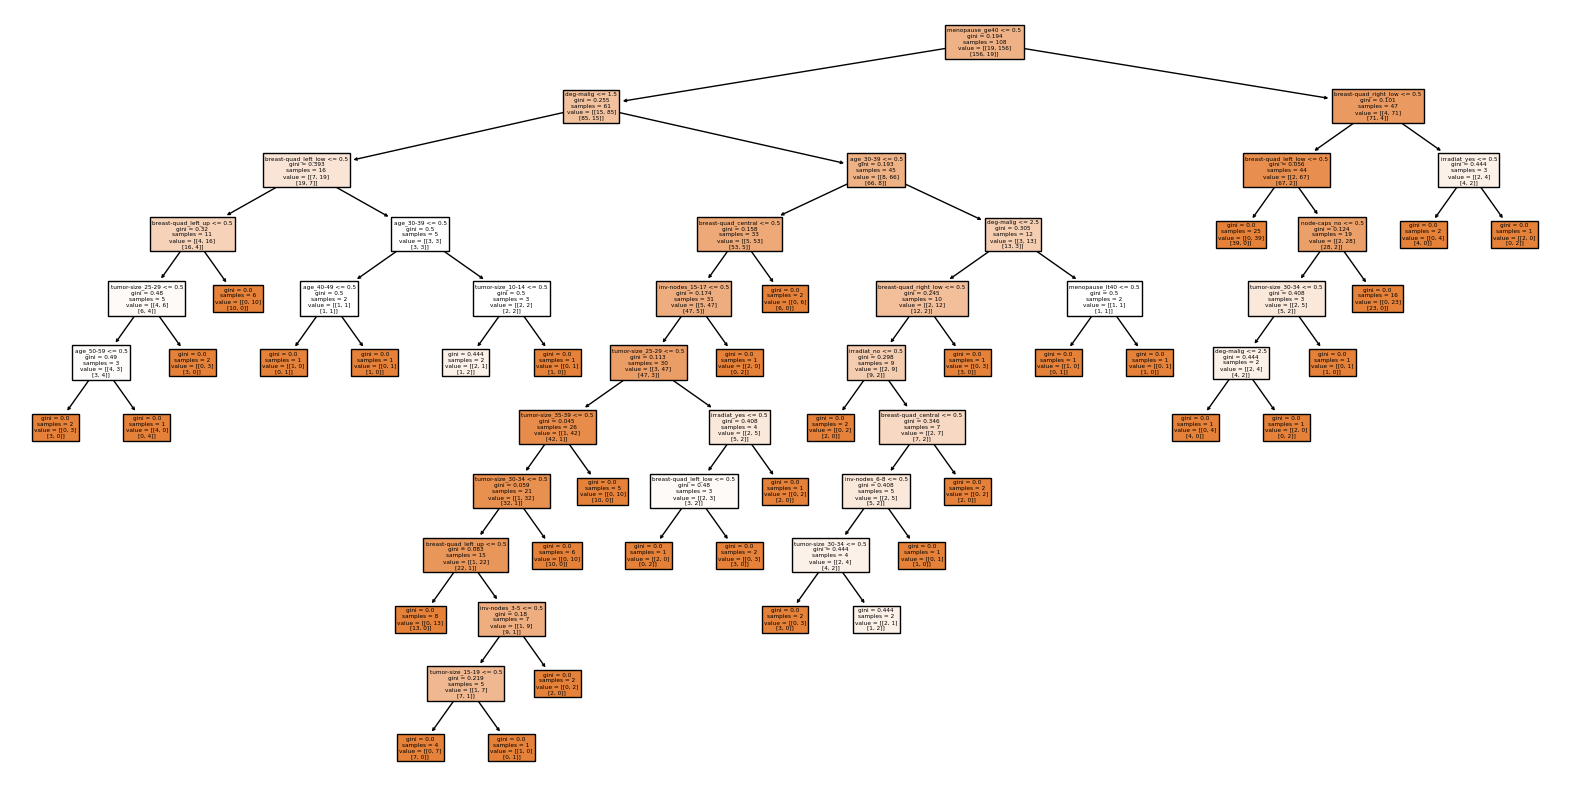

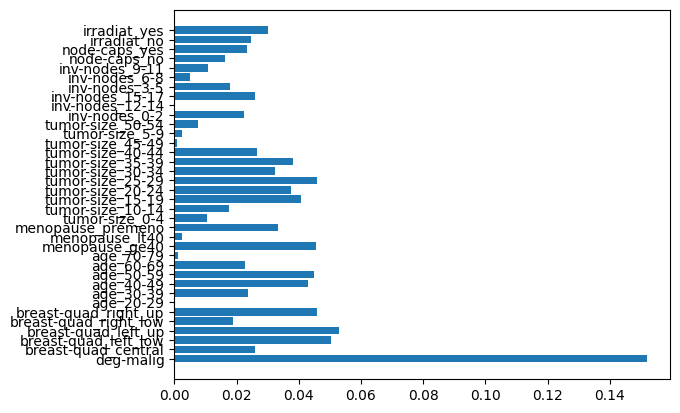

In [1051]:
# Visualizing the single decision tree in the random forest
plt.figure(figsize=(20,10))
plot_tree(rfc.estimators_[0], filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

# Visualizing feature importances
importances = rfc.feature_importances_
plt.barh(range(len(importances)), importances, tick_label=feature_names)
plt.show()

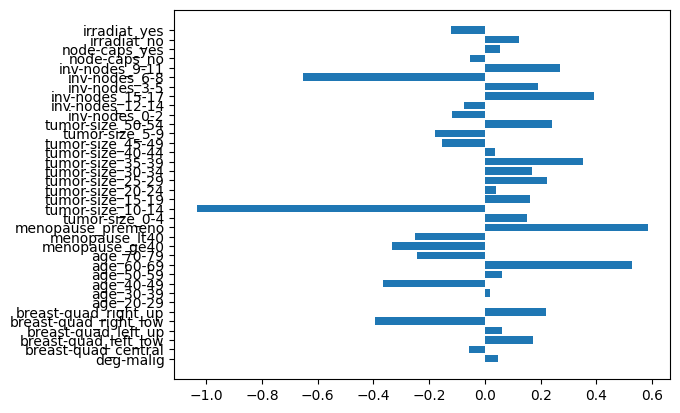

In [1052]:
# Visualize the logistic regression model
coef = lr.coef_[0]
plt.barh(range(len(coef)), coef, tick_label=feature_names)
plt.show()

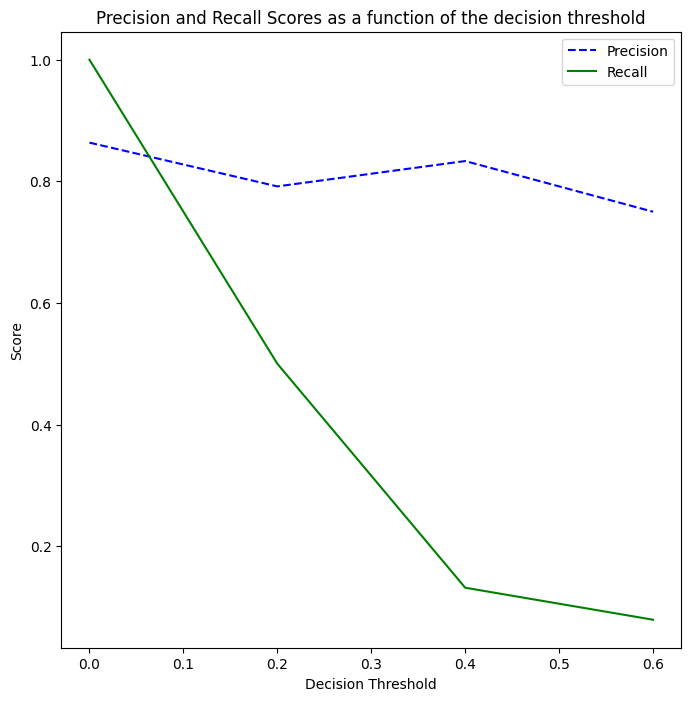

In [1058]:
# visuzlize the knn Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

missing_columns = set(X_train.columns) - set(X_test.columns)
for col in missing_columns:
    X_test[col] = 0
X_test = X_test[X_train.columns]
y_probs = knn.predict_proba(X_test)[:, 1]
y_test_binary = y_test.iloc[:, 0]

# calculating precision and recall
precisions, recalls, thresholds = precision_recall_curve(y_test_binary, y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()